# App Reviews Santiment Analysis 

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\New folder (2)\\linkedin-reviews.csv")
df.head(2)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1


In [3]:
import matplotlib.pyplot as plt      # liabaray import ki 
import seaborn as sns

In [4]:
df.info()    # data frame ka current status 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis 

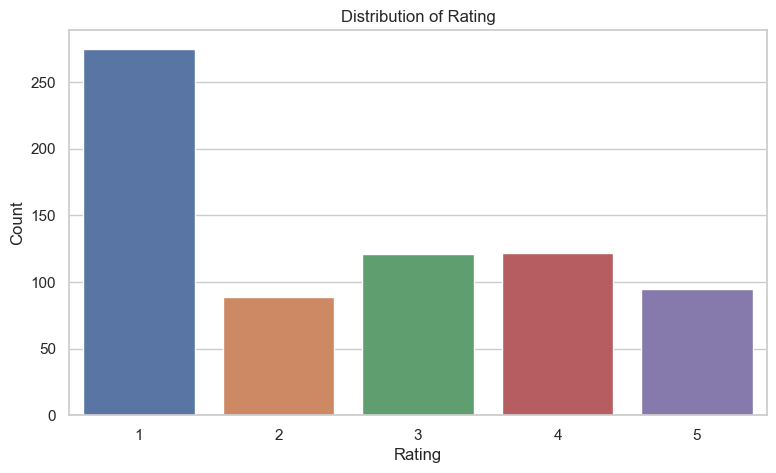

In [5]:
# Plotting the distribution of rating 
sns.set(style ='whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data =df,
                x = 'Rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Now we will anayze the length of reviews,an this can somtimes correlate withthe sentiment and detail of feedback

In [6]:
# calculate the lenght of each reviews 
df['Review Length'] = df['Review'].apply(len)

In [7]:
df.head(2)

,Review,Rating,Review Length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23


Text(0, 0.5, 'Count')

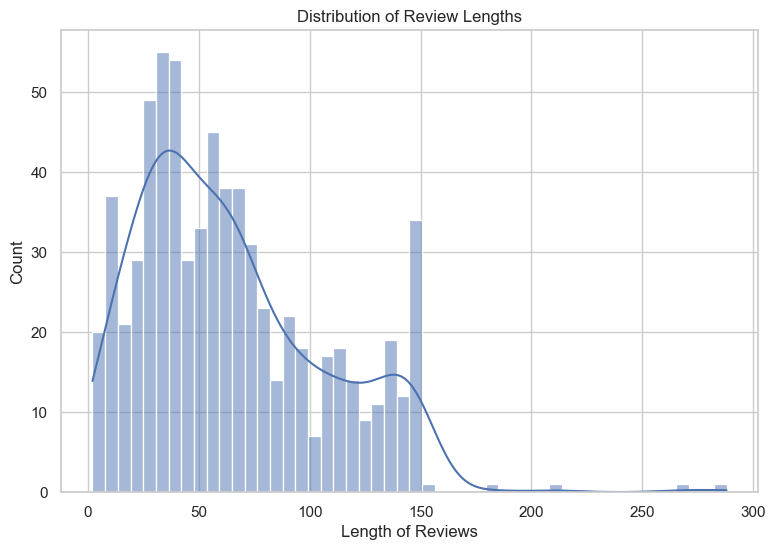

In [8]:
# Plotting the distribution of review lengths
plt.figure(figsize = (9,6))
sns.histplot(df['Review Length'], bins = 50, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel("Length of Reviews")
plt.ylabel("Count")


# Adding santiment label in the data 
we will use Textblob libraray. Taxtblob Provides polatry score ranging from -1(very negative)to 1(very positive)for a given test.We can use this score to classify each reviews sentiment as positive, negative and nutral. 

In [9]:
from textblob import TextBlob

In [10]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    
    if sentiment.polarity > 0.1:
         return 'Positive'
    elif sentiment.polarity < -0.1:
         return 'Negative'
    else:
         return 'Netural'
    

In [11]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [12]:
df.head(3)

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Netural
2,Slow and it tries to upload your contacts with...,1,61,Negative


In [13]:
sen_distribution = df['Sentiment'].value_counts()     #Value count nikalna 
sen_distribution

Positive    298
Netural     297
Negative    107
Name: Sentiment, dtype: int64

In [14]:
sen_distribution = df['Sentiment'].value_counts()
print(sen_distribution.index)
print(sen_distribution.values)


Index(['Positive', 'Netural', 'Negative'], dtype='object')
[298 297 107]


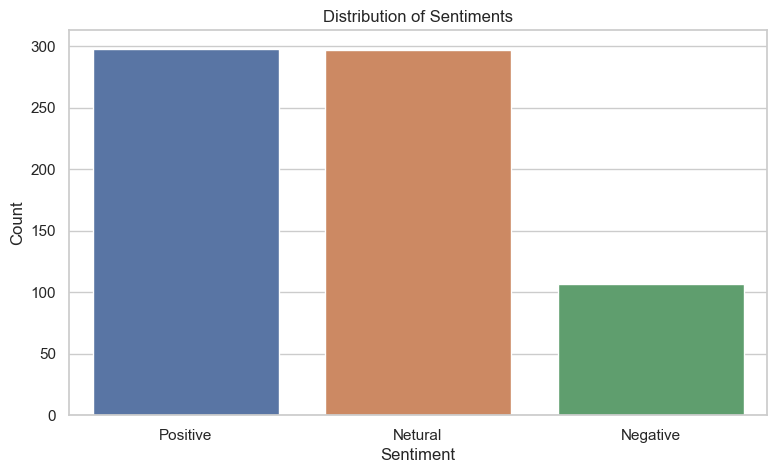

In [17]:
plt.figure(figsize = (9,5))
sns.barplot(x = sen_distribution.index,
            y = sen_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So we can see although the app has low ratings, still the reviewers dont use many negative words in the reviews for the app 

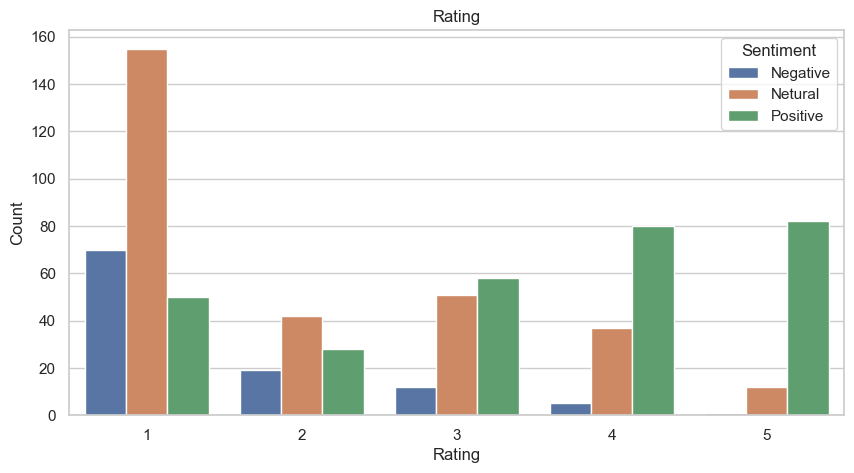

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.title('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

In [ ]:
Summery 
So App Reviews Sentiment analysis is a vaulable tool for the app developers and business to understand user feedback